In [1]:
import re
import os

In [58]:
os.chdir('/cluster/home/bdayan/girgs/benji_src')
fn = 'chung_lu_accuracies_and_ER_LL.out'

In [59]:
with open(fn) as file:
    lines = file.readlines()

In [60]:
lines

['/cluster/scratch/bdayan/GIRG_data/socfb-Caltech36.SpaceOne\n',
 '/cluster/scratch/bdayan/GIRG_data/socfb-Reed98.SpaceOne\n',
 '/cluster/scratch/bdayan/GIRG_data/socfb-Haverford76.SpaceOne\n',
 '/cluster/scratch/bdayan/GIRG_data/socfb-Simmons81.SpaceOne\n',
 '/cluster/scratch/bdayan/GIRG_data/socfb-Swarthmore42.SpaceOne\n',
 '/cluster/scratch/bdayan/GIRG_data/socfb-Amherst41.SpaceOne\n',
 '/cluster/scratch/bdayan/GIRG_data/socfb-Bowdoin47.SpaceOne\n',
 '/cluster/scratch/bdayan/GIRG_data/socfb-Hamilton46.SpaceOne\n',
 '/cluster/scratch/bdayan/GIRG_data/socfb-Trinity100.SpaceOne\n',
 '/cluster/scratch/bdayan/GIRG_data/socfb-USFCA72.SpaceOne\n',
 '/cluster/scratch/bdayan/GIRG_data/socfb-Williams40.SpaceOne\n',
 '/cluster/scratch/bdayan/GIRG_data/socfb-Oberlin44.SpaceOne\n',
 '/cluster/scratch/bdayan/GIRG_data/socfb-Wellesley22.SpaceOne\n',
 '/cluster/scratch/bdayan/GIRG_data/socfb-Smith60.SpaceOne\n',
 '/cluster/scratch/bdayan/GIRG_data/socfb-Vassar85.SpaceOne\n',
 '/cluster/scratch/bday

In [61]:
re.match('nodes, edges.*?(\d*)\s.*\n', lines[333]).group(1)

AttributeError: 'NoneType' object has no attribute 'group'

In [62]:
lines[333]

'0.06674303763680042 0.933140959935826\n'

In [63]:
re.match('processing ', lines[333]).group(1)

AttributeError: 'NoneType' object has no attribute 'group'

In [64]:
lines[333:350]

['0.06674303763680042 0.933140959935826\n',
 '[[  12002  167822]\n',
 ' [ 167510 8179066]]\n',
 'chunglu LL: -746717.0105372074\n',
 'er LL: -5908026.13055895\n',
 'processing: socfb-Smith60\n',
 'Network Properties:\n',
 'nodes, edges\t\t\t2970, 97133\n',
 'directed?\t\t\tFalse\n',
 'weighted?\t\t\tFalse\n',
 'isolated nodes\t\t\t0\n',
 'self-loops\t\t\t0\n',
 'density\t\t\t\t0.022031\n',
 'clustering coefficient\t\t0.283450\n',
 'min/max/avg degree\t\t1, 349, 65.409428\n',
 'degree assortativity\t\t0.043831\n',
 'number of connected components\t1\n']

In [67]:
outs = [[1,2,3]]
matches = {
    'name': 'processing: (.*)\n',
    'nodes': 'nodes, edges\t\t\t(\d*),.*',
    'percent': '(0[.]\d*).*',
    'll': 'chunglu LL: (.*)'
}
for line in lines:
    if len(outs[-1]) == 4:
        match = re.match(matches['name'], line)
        if match:
            outs.append([match.group(1)])
    elif len(outs[-1]) == 1:
        match = re.match(matches['nodes'], line)
        if match:
            outs[-1].append(match.group(1))
    elif len(outs[-1]) == 2:
        match = re.match(matches['percent'], line)
        if match:
            outs[-1].append(match.group(1))
    elif len(outs[-1]) == 3:
        match = re.match(matches['ll'], line)
        if match:
            outs[-1].append(match.group(1))



outs = outs[1:]


In [68]:
outs

[['socfb-Reed98', '962', '0.13337231554327025', '-128476.06068462232'],
 ['socfb-Haverford76', '1446', '0.13724009464834114', '-388035.7785495379'],
 ['socfb-Simmons81', '1510', '0.07834101382488479', '-256902.68859759285'],
 ['socfb-Swarthmore42', '1657', '0.12041147275139642', '-423188.28749773686'],
 ['socfb-Amherst41', '2235', '0.09493810057831431', '-670400.0038853943'],
 ['socfb-Bowdoin47', '2250', '0.08362761595525324', '-643984.9938777979'],
 ['socfb-Hamilton46', '2312', '0.09073272955505068', '-722084.9972419947'],
 ['socfb-Trinity100', '2613', '0.07682417229186757', '-865351.5644646822'],
 ['socfb-USFCA72', '2672', '0.06641223714057998', '-549101.4464208026'],
 ['socfb-Williams40', '2788', '0.07483294242598575', '-890662.6224498167'],
 ['socfb-Oberlin44', '2920', '0.06674303763680042', '-746717.0105372074'],
 ['socfb-Smith60', '2970', '0.05485262475162921', '-823432.0244003682'],
 ['socfb-Wellesley22', '2970', '0.06832527213142393', '-783543.7416416925'],
 ['socfb-Middlebury4

In [69]:
import pandas as pd
df = pd.DataFrame(data=outs)

In [70]:
df.columns = ['name', 'nodes', 'pec', 'll']
df = df.iloc[:-1]

In [71]:
df.nodes = df.nodes.apply(lambda x: int(x))
df['pec'] = df['pec'].apply(lambda x: float(x))
df['ll'] = df['ll'].apply(lambda x: float(x))


<AxesSubplot:xlabel='nodes'>

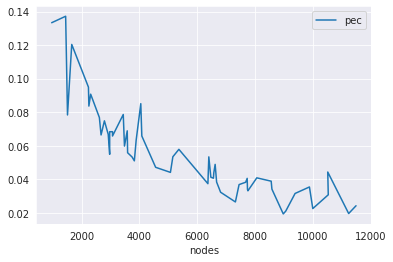

In [72]:
df.plot(x='nodes', y='pec')

In [73]:
lines[-30:]

['nodes, edges\t\t\t11498, 486961\n',
 'directed?\t\t\tFalse\n',
 'weighted?\t\t\tFalse\n',
 'isolated nodes\t\t\t0\n',
 'self-loops\t\t\t0\n',
 'density\t\t\t\t0.007367\n',
 'clustering coefficient\t\t0.209972\n',
 'min/max/avg degree\t\t1, 1377, 84.703601\n',
 'degree assortativity\t\t0.076925\n',
 'number of connected components\t1\n',
 'size of largest component\t11498 (100.00 %)\n',
 'no results_df\n',
 '0.024162099223551784 0.9758377023022566\n',
 '[[    23532    950390]\n',
 ' [   950382 130279700]]\n',
 'chunglu LL: -5085227.916695785\n',
 'er LL: -91628862.82503635\n',
 'processing: socfb-Stanford3\n',
 'Network Properties:\n',
 'nodes, edges\t\t\t11586, 568309\n',
 'directed?\t\t\tFalse\n',
 'weighted?\t\t\tFalse\n',
 'isolated nodes\t\t\t0\n',
 'self-loops\t\t\t0\n',
 'density\t\t\t\t0.008468\n',
 'clustering coefficient\t\t0.241639\n',
 'min/max/avg degree\t\t1, 1172, 98.102710\n',
 'degree assortativity\t\t0.102033\n',
 'number of connected components\t1\n',
 'size of larg

In [74]:
len(lines)

1206

In [75]:
df

,name,nodes,pec,ll
0,socfb-Reed98,962,0.133372,-1.284761e+05
1,socfb-Haverford76,1446,0.137240,-3.880358e+05
2,socfb-Simmons81,1510,0.078341,-2.569027e+05
3,socfb-Swarthmore42,1657,0.120411,-4.231883e+05
4,socfb-Amherst41,2235,0.094938,-6.704000e+05
5,socfb-Bowdoin47,2250,0.083628,-6.439850e+05
6,socfb-Hamilton46,2312,0.090733,-7.220850e+05
7,socfb-Trinity100,2613,0.076824,-8.653516e+05
8,socfb-USFCA72,2672,0.066412,-5.491014e+05
9,socfb-Williams40,2788,0.074833,-8.906626e+05


In [76]:
with open('/cluster/home/bdayan/girgs/benji_src/mcmc_LLs_with_e.out') as file:
    lines = file.readlines()

outs = [[1,2,3]]
matches = {
    'name': 'socfb-(.*).pkl\n',
    'nodes': 'nodes, edges\t\t\t(\d*),.*',
    'll': 'final LL: (.*)',
    'percent': 'MC pec, pfew after: (0[.]\d*).*'
}
for line in lines:
    if len(outs[-1]) == 4:
        match = re.match(matches['name'], line)
        if match:
            outs.append([match.group(1)])
    elif len(outs[-1]) == 1:
        match = re.match(matches['nodes'], line)
        if match:
            outs[-1].append(match.group(1))
    elif len(outs[-1]) == 2:
        match = re.match(matches['ll'], line)
        if match:
            outs[-1].append(match.group(1))
    elif len(outs[-1]) == 3:
        match = re.match(matches['percent'], line)
        if match:
            outs[-1].append(match.group(1))


outs = outs[1:]


In [77]:
outs

[['Amherst41-1d', '2235', '-593193.4932570318', '0.19930954108670318'],
 ['Amherst41-2d', '2235', '-612652.4857207256', '0.19866086153440202'],
 ['Amherst41-3d', '2235', '-645270.7351400192', '0.18165226378169183'],
 ['Bowdoin47-1d', '2250', '-606876.1870694098', '0.17004005403739958'],
 ['Bowdoin47-2d', '2250', '-592629.3702927303', '0.18049202474344087'],
 ['Bowdoin47-3d', '2250', '-625639.0911339273', '0.16676936932666556'],
 ['Caltech36-1d', '762', '-91639.30641510898', '0.27103477268632514'],
 ['Caltech36-2d', '762', '-95120.31047722745', '0.2587832562608852'],
 ['Caltech36-3d', '762', '-101373.00824553912', '0.24280823974536064'],
 ['Hamilton46-1d', '2312', '-673908.2194643891', '0.1740271596485222'],
 ['Hamilton46-2d', '2312', '-675752.8267425632', '0.1847125828639009'],
 ['Haverford76-1d', '1446', '-363592.26279438153', '0.21218681300239978'],
 ['Haverford76-2d', '1446', '-371642.1761729029', '0.21065968551242678'],
 ['Haverford76-3d', '1446', '-393593.1231104818', '0.195338065

In [78]:
import pandas as pd

In [85]:
df_mc = pd.DataFrame(data=outs)
df_mc.columns = ['name', 'nodes', 'll', 'pec']
df_mc['1d'] = df_mc['name'].apply(lambda x: x[-2] == '1')
df_mc['ll'] = df_mc['ll'].apply(lambda x: float(x))
df_mc['pec'] = df_mc['pec'].apply(lambda x: float(x))

In [86]:
df_mc

,name,nodes,ll,pec,1d
0,Amherst41-1d,2235,-593193.493257,0.199310,True
1,Amherst41-2d,2235,-612652.485721,0.198661,False
2,Amherst41-3d,2235,-645270.735140,0.181652,False
3,Bowdoin47-1d,2250,-606876.187069,0.170040,True
4,Bowdoin47-2d,2250,-592629.370293,0.180492,False
5,Bowdoin47-3d,2250,-625639.091134,0.166769,False
6,Caltech36-1d,762,-91639.306415,0.271035,True
7,Caltech36-2d,762,-95120.310477,0.258783,False
8,Caltech36-3d,762,-101373.008246,0.242808,False
9,Hamilton46-1d,2312,-673908.219464,0.174027,True


In [87]:
df_mc.loc[df_mc['1d']]

,name,nodes,ll,pec,1d
0,Amherst41-1d,2235,-593193.493257,0.199310,True
3,Bowdoin47-1d,2250,-606876.187069,0.170040,True
6,Caltech36-1d,762,-91639.306415,0.271035,True
9,Hamilton46-1d,2312,-673908.219464,0.174027,True
11,Haverford76-1d,1446,-363592.262794,0.212187,True
14,Reed98-1d,962,-124403.059852,0.188497,True
17,Simmons81-1d,1510,-229941.909930,0.177450,True


In [88]:
df

,name,nodes,pec,ll
0,socfb-Reed98,962,0.133372,-1.284761e+05
1,socfb-Haverford76,1446,0.137240,-3.880358e+05
2,socfb-Simmons81,1510,0.078341,-2.569027e+05
3,socfb-Swarthmore42,1657,0.120411,-4.231883e+05
4,socfb-Amherst41,2235,0.094938,-6.704000e+05
5,socfb-Bowdoin47,2250,0.083628,-6.439850e+05
6,socfb-Hamilton46,2312,0.090733,-7.220850e+05
7,socfb-Trinity100,2613,0.076824,-8.653516e+05
8,socfb-USFCA72,2672,0.066412,-5.491014e+05
9,socfb-Williams40,2788,0.074833,-8.906626e+05
